In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [12]:
def resize_image(image, width = None, height = None, inter = None ):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [3]:
src = cv2.imread('../data/fieldprint.jpg'); src.shape

(2287, 440, 3)

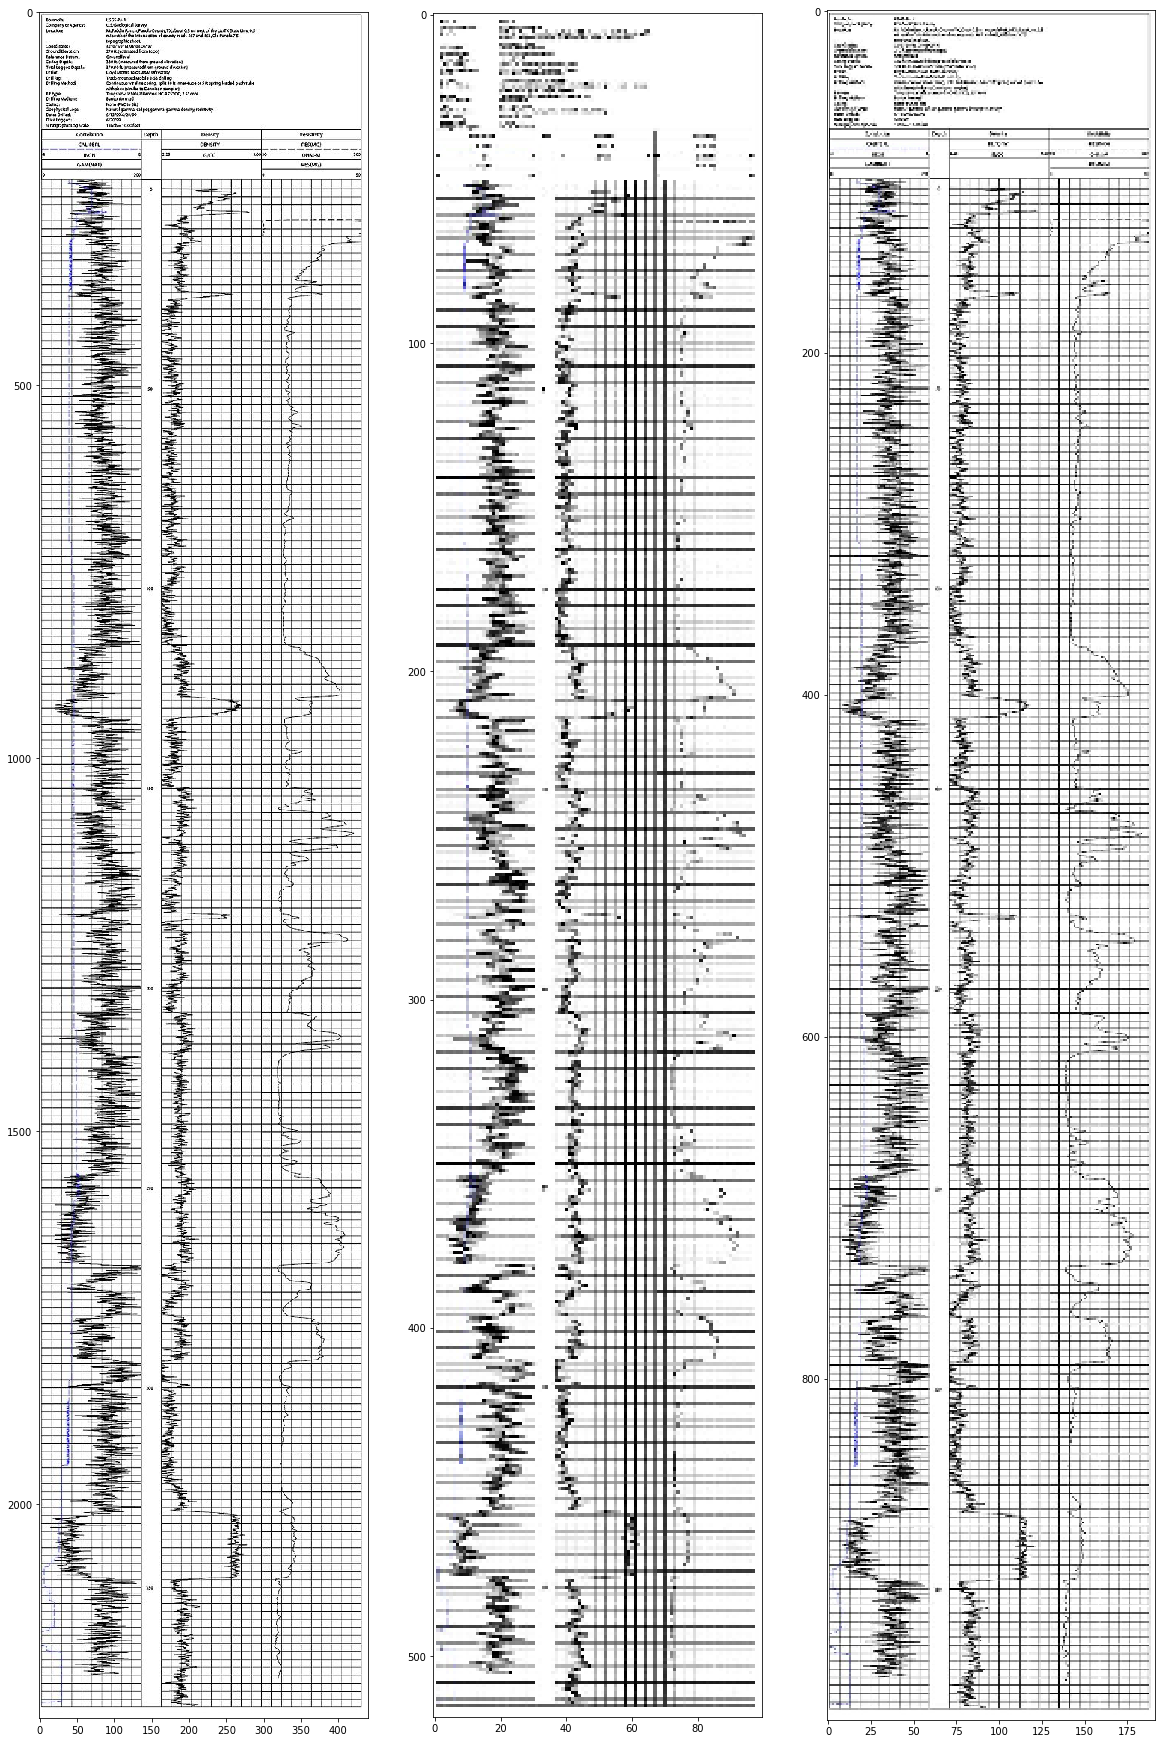

In [13]:
new_w = resize_image(src, width=100, height=None, inter=cv2.INTER_CUBIC)
new_h = resize_image(src, width=None, height=1000, inter=cv2.INTER_CUBIC)

_ = plt.figure(figsize=(20,40))

_ = plt.subplot(1, 3, 1)
_ = plt.imshow(src)

_ = plt.subplot(1, 3, 2)
_ = plt.imshow(new_w)

_ = plt.subplot(1, 3, 3)
_ = plt.imshow(new_h)

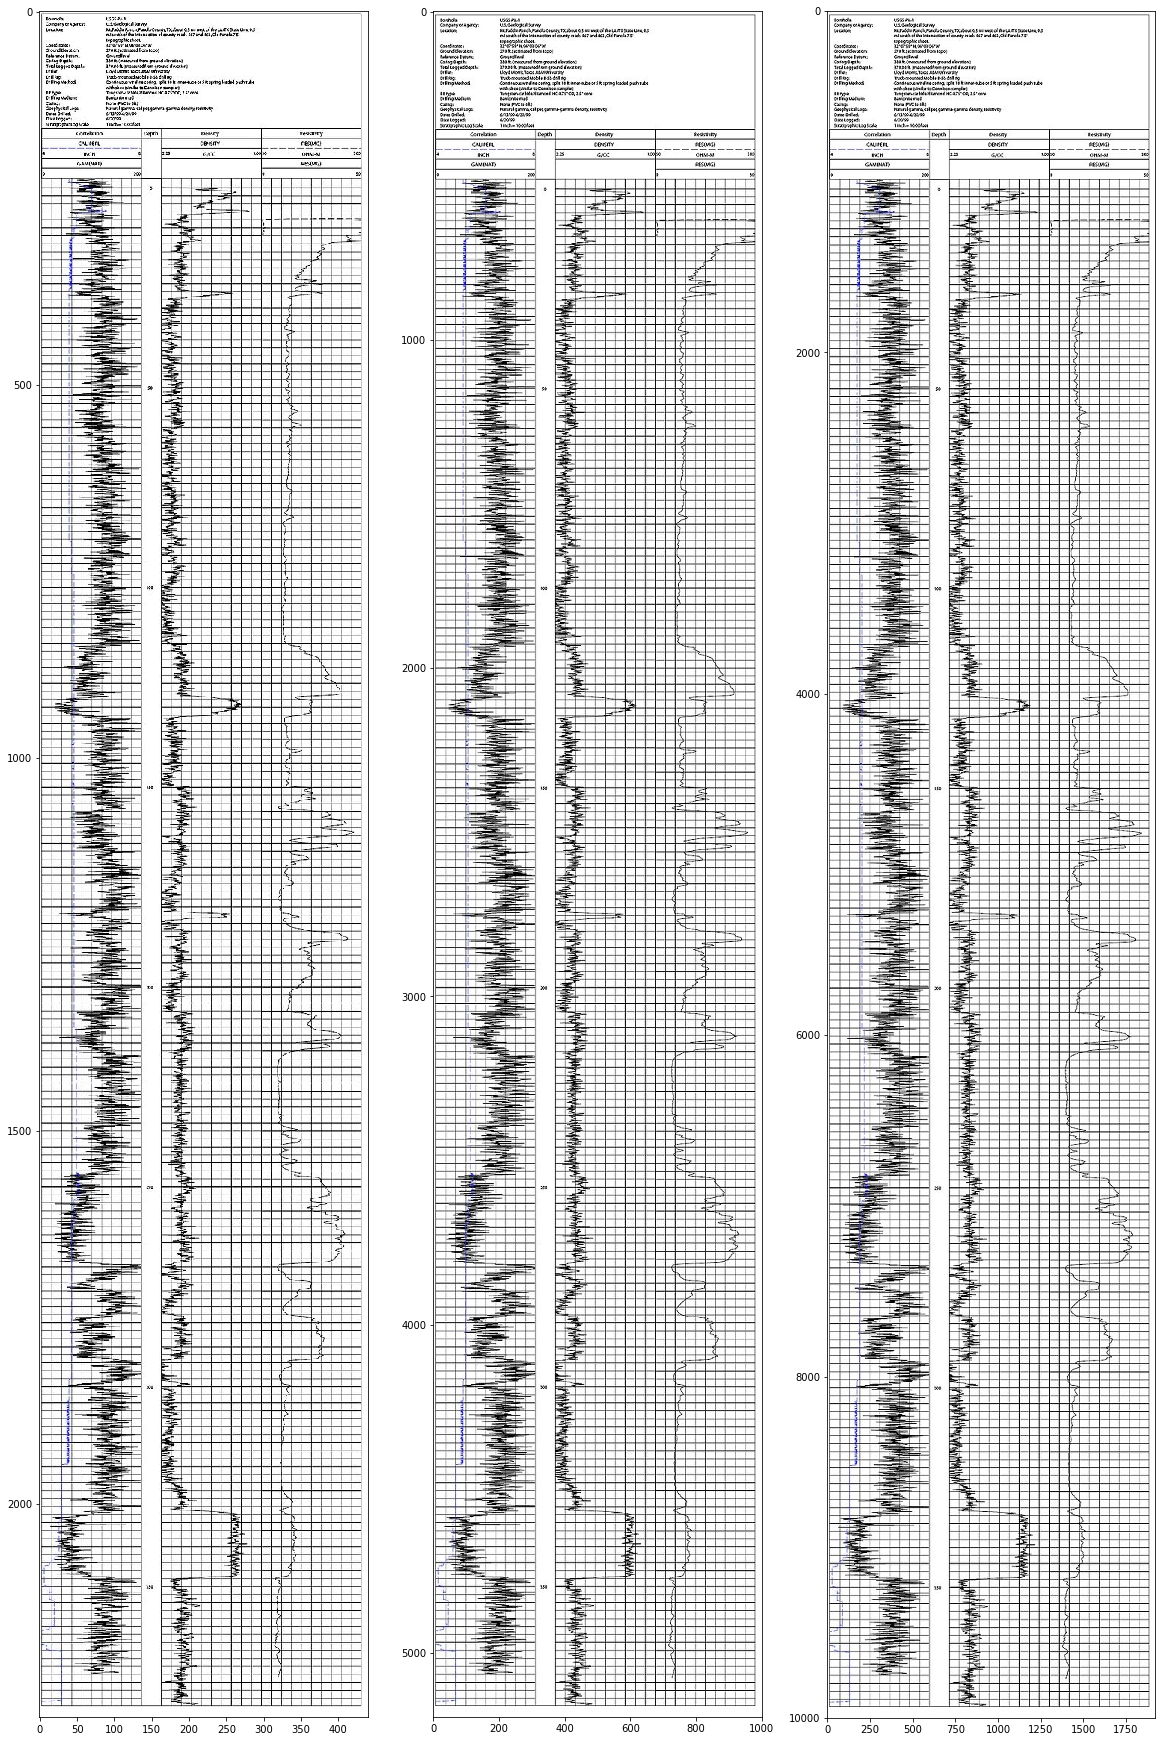

In [14]:
new_w = resize_image(src, width=1000, height=None, inter=cv2.INTER_CUBIC)
new_h = resize_image(src, width=None, height=10000, inter=cv2.INTER_CUBIC)

_ = plt.figure(figsize=(20,40))

_ = plt.subplot(1, 3, 1)
_ = plt.imshow(src)

_ = plt.subplot(1, 3, 2)
_ = plt.imshow(new_w)

_ = plt.subplot(1, 3, 3)
_ = plt.imshow(new_h)

### Putting into `iman2`

In [15]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(0, '/home/cyyam/notebooks/git/python-cheatsheet/utility/')

import iman2
import cv2

In [17]:
src = cv2.imread('../data/fieldprint.jpg'); src.shape
new = iman2.resize_image(src, width=4000, height=None, inter=cv2.INTER_CUBIC); new.shape

(2287, 440, 3)

(20790, 4000, 3)

In [19]:
import os
import glob

In [28]:
output_path = "../data/"

for file in glob.glob('../data/*.tiff'):
    print(file)

    src = cv2.imread(file); print(src.shape)
    resized = resize_image(src, width=100, height=None, inter=cv2.INTER_CUBIC)

    output_fname = os.path.join(output_path, (os.path.basename(file)[:-5] + '_resized.tiff')); print(output_fname)
    cv2.imwrite(output_fname, resized)

../data/0000_rgb.tiff
(679, 1024, 3)
../data/0000_rgb_resized.tiff


True

../data/0000_nir.tiff
(679, 1024, 3)
../data/0000_nir_resized.tiff


True

../data/0000_nir_resized.tiff
(66, 100, 3)
../data/0000_nir_resized_resized.tiff


True

../data/0000_rgb_resized.tiff
(66, 100, 3)
../data/0000_rgb_resized_resized.tiff


True